#  제9장

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
from ipypublish import nb_setup

In [2]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv("education2020.csv")

In [4]:
df1 =  df.loc[ (df['income'] > 0) &  (df['asset'] > 0) &  (df['education_year'] > 0) & (df['age'] > 0) ]

In [5]:
df2 = df1.copy()

In [6]:
df2['ln_income'] = np.log(df2['income'])

In [7]:
df2['ln_asset'] = np.log(df1['asset'])

In [8]:
df2['ln_eduYear'] = np.log(df1['education_year'])

In [9]:
df2.head()

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year,ln_income,ln_asset,ln_eduYear
0,0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16,8.793764,11.626254,2.772589
1,1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21,9.782449,10.657259,3.044522
2,2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2,6,6.811244,8.650325,1.791759
3,3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2,12,7.918629,9.607101,2.484907
4,4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3,12,6.922644,6.701960,2.484907


In [10]:
edu_model01 = ols("income ~  education_year", data=df2).fit()
print(edu_model01.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     3037.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:49:14   Log-Likelihood:            -1.7086e+05
No. Observations:               17135   AIC:                         3.417e+05
Df Residuals:                   17133   BIC:                         3.417e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1809.2194    142.121    -12.

### 교유기간이 1년 증가하면 가구주의 연소득은 607만원 증가한다.

In [11]:
edu_model02 = ols("income ~  ln_eduYear", data=df2).fit()
print(edu_model02.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2669.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:49:20   Log-Likelihood:            -1.7102e+05
No. Observations:               17135   AIC:                         3.420e+05
Df Residuals:                   17133   BIC:                         3.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9597.9808    299.030    -32.097      0.0

### 가구주의 교육기간이 1% 증가하면 가구주의 연소득은  62만원 증가합니다.

In [12]:
edu_model03 = ols("ln_income ~  education_year", data=df2).fit()
print(edu_model03.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     5110.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:49:35   Log-Likelihood:                -20106.
No. Observations:               17135   AIC:                         4.022e+04
Df Residuals:                   17133   BIC:                         4.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.8245      0.021    317.

In [13]:
edu_model04 = ols("ln_income ~  ln_eduYear", data=df2).fit()
print(edu_model04.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     5019.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:49:39   Log-Likelihood:                -20141.
No. Observations:               17135   AIC:                         4.029e+04
Df Residuals:                   17133   BIC:                         4.030e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1496      0.045    114.831      0.0

### 가구주의 교육기간이 1% 증가하면 가구주의 연소득은  약 1.28% 증가합니다.

## 나이와 소득

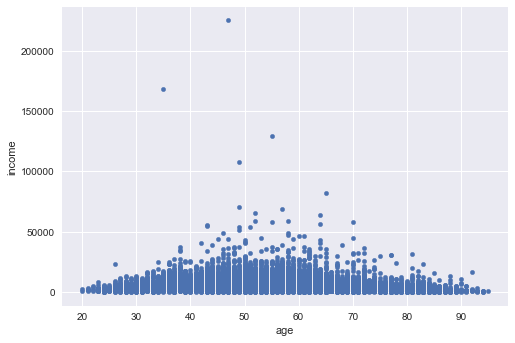

In [78]:
plt.style.use('seaborn')
df2.plot(x='age', y='income', kind='scatter')
plt.savefig("age_income01.png", dpi=150, bbox_inches='tight')
plt.show()

In [79]:
edu_model = ols("income ~  education_year + age", data=df2).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     1520.
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        17:11:33   Log-Likelihood:            -1.7086e+05
No. Observations:               17135   AIC:                         3.417e+05
Df Residuals:                   17132   BIC:                         3.417e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1428.5711    306.888     -4.

In [8]:
# 각 계수의 최소자승 추정량을 구하고 그 결과를 해석합니다.
# 기울기,
# 절편,

In [81]:
# 연령과 임금과는 선형관계이기 보다는 이차다항식으로 표시하는 것이 적합하다.

In [15]:
df2['age2'] = df2['age']**2

In [16]:
edu_model = ols("income ~ education_year + age + age2", data=df2).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     1284.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        14:44:39   Log-Likelihood:            -1.7052e+05
No. Observations:               17135   AIC:                         3.410e+05
Df Residuals:                   17131   BIC:                         3.411e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -1.4e+04    565.065    -24.

In [17]:
print('Parameters: ', edu_model.params)

Parameters:  Intercept        -14003.251429
education_year      572.073672
age                 483.863627
age2                 -4.329731
dtype: float64


In [18]:
print('R2: ', edu_model.rsquared)

R2:  0.1836085331823616


#### 해당 회귀식으로부터 추정된 이차다항식으로부터 어떠한 연령집단에서 임금이 최대치가 되는지 설명합니다


$
income = -14003 + 572 edu + 483 age - 4.3 age2 \\
\frac{\partial income}{\partial age} =483 - 4.3 \times 2 \times age \\
0 = 483 - 8.6 \times age
age  = 483/8.6 \\
age = 56
$

In [19]:
483/8.6

56.162790697674424

### 성별과 직업종류가 소득에 영향을 미친다

In [20]:
df2['job_code'] = df2['job']

In [21]:
df2['sex'] = (df2['sex']).astype(int)

In [22]:
df2

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,...,income_d,industry,job,house,education_year,ln_income,ln_asset,ln_eduYear,age2,job_code
0,0,2020,G1,10000112,1,34,3,6,2,112000,...,4599,F,3,2,16,8.793764,11.626254,2.772589,1156,3
1,1,2020,G1,10000132,2,45,2,8,2,42500,...,15257,J,2,3,21,9.782449,10.657259,3.044522,2025,2
2,2,2020,G1,10000162,2,73,1,2,3,5712,...,725,T,4,2,6,6.811244,8.650325,1.791759,5329,4
3,3,2020,G1,10000182,1,58,2,4,2,14870,...,2431,C,5,2,12,7.918629,9.607101,2.484907,3364,5
4,4,2020,G1,10000192,2,27,1,4,1,814,...,893,R,2,3,12,6.922644,6.701960,2.484907,729,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,18059,2020,G2,993800291,1,42,3,6,2,6705,...,-390,NaN,NaN,3,16,5.187386,8.810609,2.772589,1764,NaN
18060,18060,2020,G2,994800251,1,49,5,6,2,130180,...,11784,O,3,1,16,9.645623,11.776673,2.772589,2401,3
18061,18061,2020,G2,994800261,1,57,5,6,2,265226,...,11560,NaN,NaN,1,16,9.622318,12.488338,2.772589,3249,NaN
18062,18062,2020,G2,994800291,2,53,2,7,4,109695,...,7074,O,2,2,18,9.117567,11.605459,2.890372,2809,2


In [23]:
sex_dummies = pd.get_dummies(df2['sex']).rename(columns=lambda x: 's'+str(x))
sex_dummies.tail()

,s1,s2
18059,1,0
18060,1,0
18061,1,0
18062,0,1
18063,1,0


In [24]:
job_dummies = pd.get_dummies(df2['job_code']).rename(columns=lambda x: 'd'+str(x))
job_dummies

,d1,d2,d3,d4,d5,d6,d7,d8,d9,dA
0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18059,0,0,0,0,0,0,0,0,0,0
18060,0,0,1,0,0,0,0,0,0,0
18061,0,0,0,0,0,0,0,0,0,0
18062,0,1,0,0,0,0,0,0,0,0


In [33]:
marriage_dummies = pd.get_dummies(df2['marriage']).rename(columns=lambda x: 'm'+str(x))

,m1,m2,m3,m4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
18059,0,1,0,0
18060,0,1,0,0
18061,0,1,0,0
18062,0,0,0,1


In [35]:
marriage_dummies.tail()

,m1,m2,m3,m4
18059,0,1,0,0
18060,0,1,0,0
18061,0,1,0,0
18062,0,0,0,1
18063,0,1,0,0


In [30]:
df3 = pd.concat([df2, job_dummies, sex_dummies, marriage_dummies], axis=1)
df3.tail()

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,...,d7,d8,d9,dA,s1,s2,m1,m2,m3,m4
18059,18059,2020,G2,993800291,1,42,3,6,2,6705,...,0,0,0,0,1,0,0,1,0,0
18060,18060,2020,G2,994800251,1,49,5,6,2,130180,...,0,0,0,0,1,0,0,1,0,0
18061,18061,2020,G2,994800261,1,57,5,6,2,265226,...,0,0,0,0,1,0,0,1,0,0
18062,18062,2020,G2,994800291,2,53,2,7,4,109695,...,0,0,0,0,0,1,0,0,0,1
18063,18063,2020,G2,995800261,1,44,5,6,2,71223,...,0,0,0,0,1,0,0,1,0,0


In [31]:
edu_model = ols("income ~ education_year + age  + age2 + s2", data=df3).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     1090.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        15:35:16   Log-Likelihood:            -1.7031e+05
No. Observations:               17135   AIC:                         3.406e+05
Df Residuals:                   17130   BIC:                         3.407e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.184e+04    568.382    -20.

In [28]:
edu1_model = ols("income ~ education_year + age + age2 + s2 + d2 + d3 + d4 +d5 + d6 + d7 + d8 + d9 + dA", data=df3).fit()
print(edu1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     412.8
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        14:48:37   Log-Likelihood:            -1.6992e+05
No. Observations:               17135   AIC:                         3.399e+05
Df Residuals:                   17121   BIC:                         3.400e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.289e+04    560.269    -23.

In [37]:
edu2_model = ols("income ~ education_year + age + age2 + s2 + d2 + d3 + d4 +d5 + d6 + d7 + d8 + d9 + dA+m2+m3+m4", data=df3).fit()
print(edu2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     409.6
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        15:55:40   Log-Likelihood:            -1.6948e+05
No. Observations:               17135   AIC:                         3.390e+05
Df Residuals:                   17118   BIC:                         3.391e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.268e+04    552.292    -22.

In [31]:
#그래프 및 잔차도

eval_env: 1


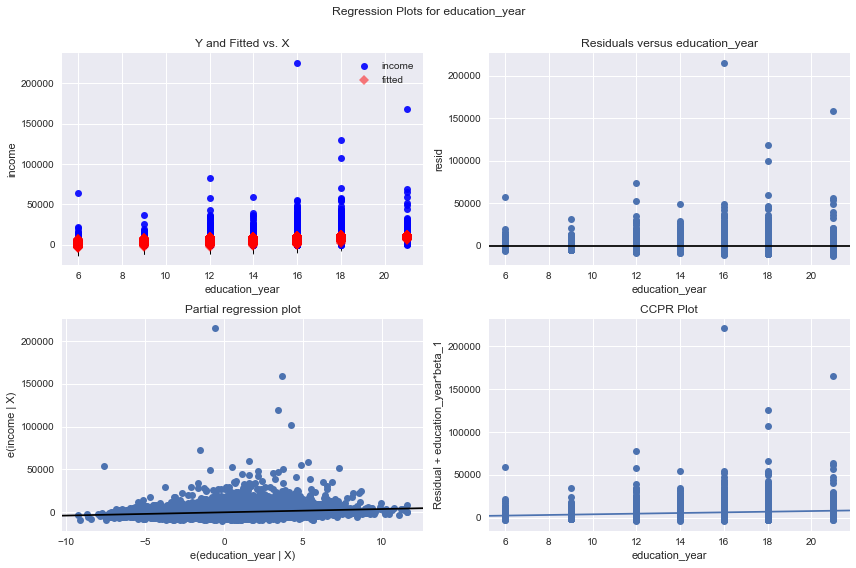

In [105]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(edu1_model, "education_year", fig=fig)

In [51]:
# 등분산성을 만족하지 않는다.